## Sakila Lecture

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [48]:
conn = sqlite3.connect('sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date,rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date','return_date'])    

In [33]:
df.shape

(16044, 10)

In [34]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  int64         
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 1.3+ MB


In [35]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


In [36]:
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [37]:
df['film_rental_rate'].median()

2.99

In [23]:
df['film_rental_rate'].unique()

array([2.99, 0.99, 4.99])

<AxesSubplot: >

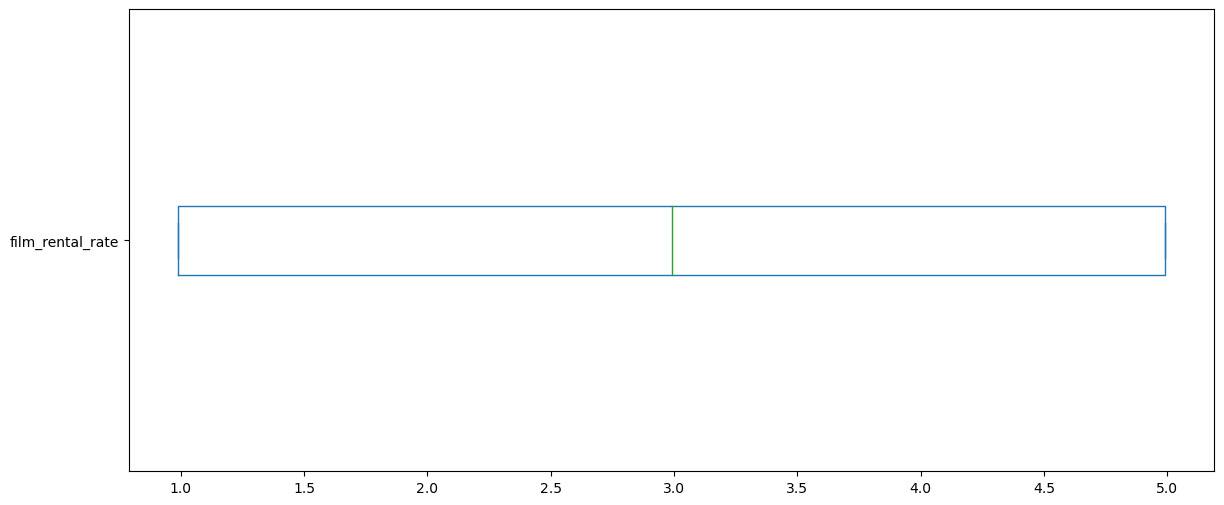

In [25]:
df['film_rental_rate'].plot(kind='box', vert = False, figsize=(14,6))

<AxesSubplot: ylabel='Density'>

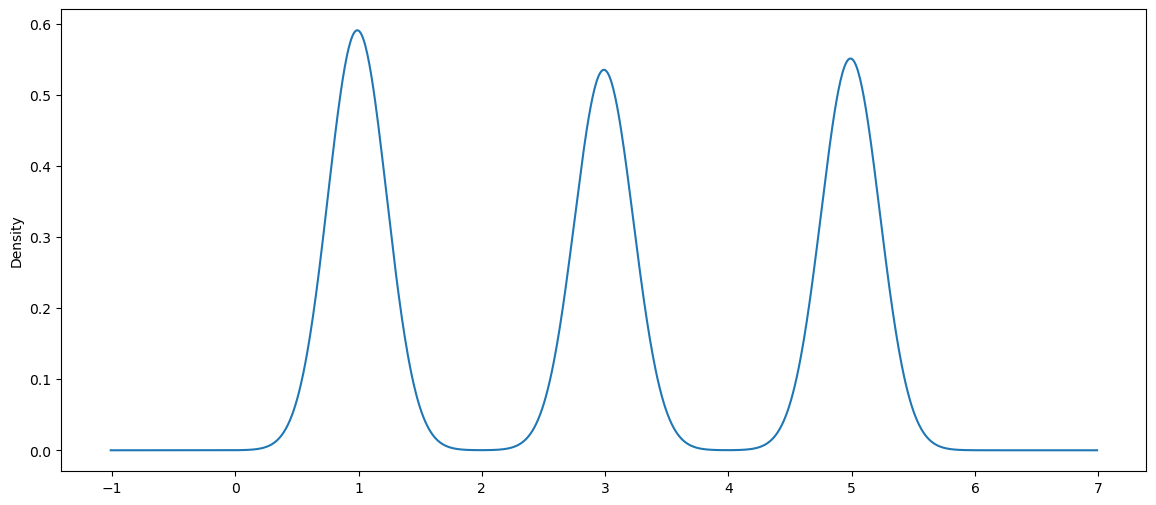

In [27]:
df['film_rental_rate'].plot(kind='density', figsize=(14,6))

Text(0, 0.5, 'Number of Rentals')

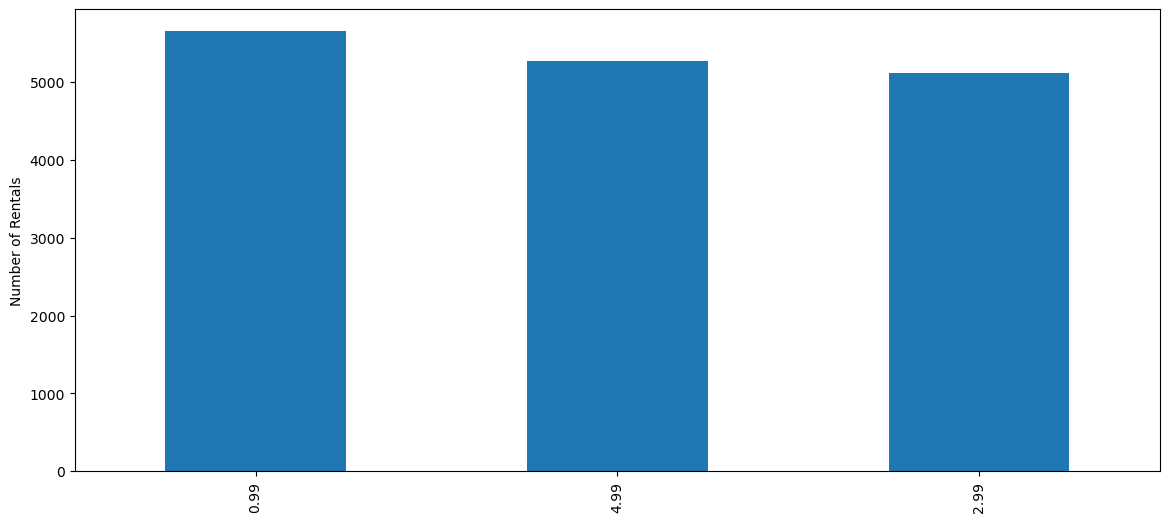

In [28]:
ax = df['film_rental_rate'].value_counts().plot(kind='bar',figsize=(14,6))
ax.set_ylabel('Number of Rentals')

In [38]:
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

<AxesSubplot: ylabel='rental_store_city'>

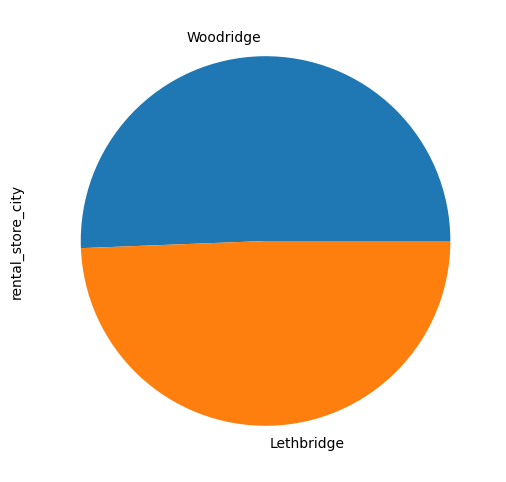

In [41]:
df['rental_store_city'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Rentals')

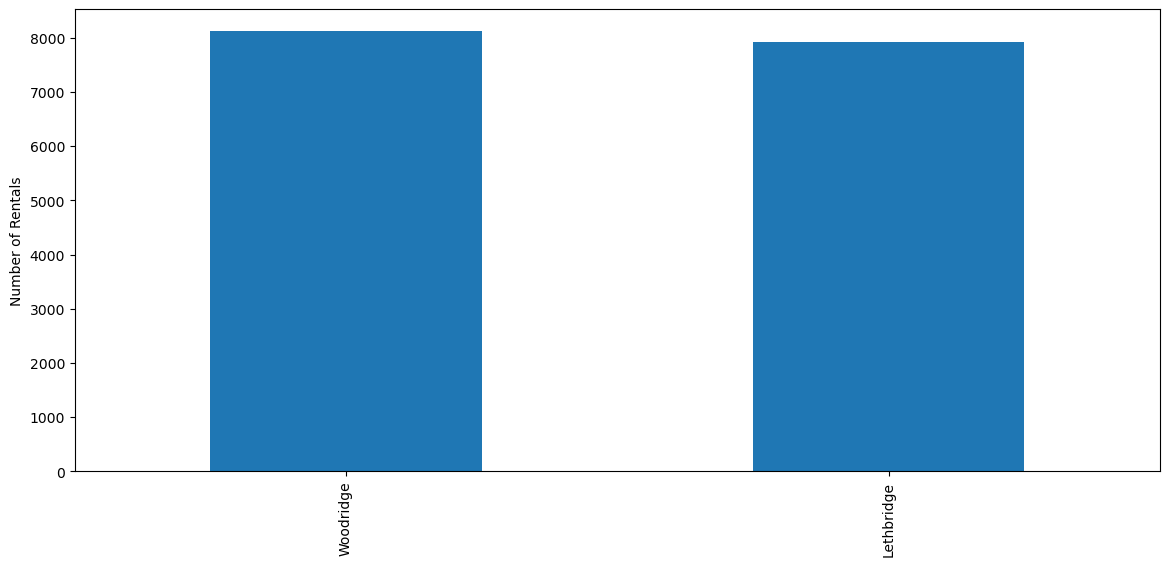

In [42]:
ax = df['rental_store_city'].value_counts().plot(kind='bar',figsize=(14,6))
ax.set_ylabel('Number of Rentals')

In [50]:
df['rental_gain_return'] = (df['film_rental_rate']/df['film_replacement_cost'])*100
df['rental_gain_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

<AxesSubplot: ylabel='Density'>

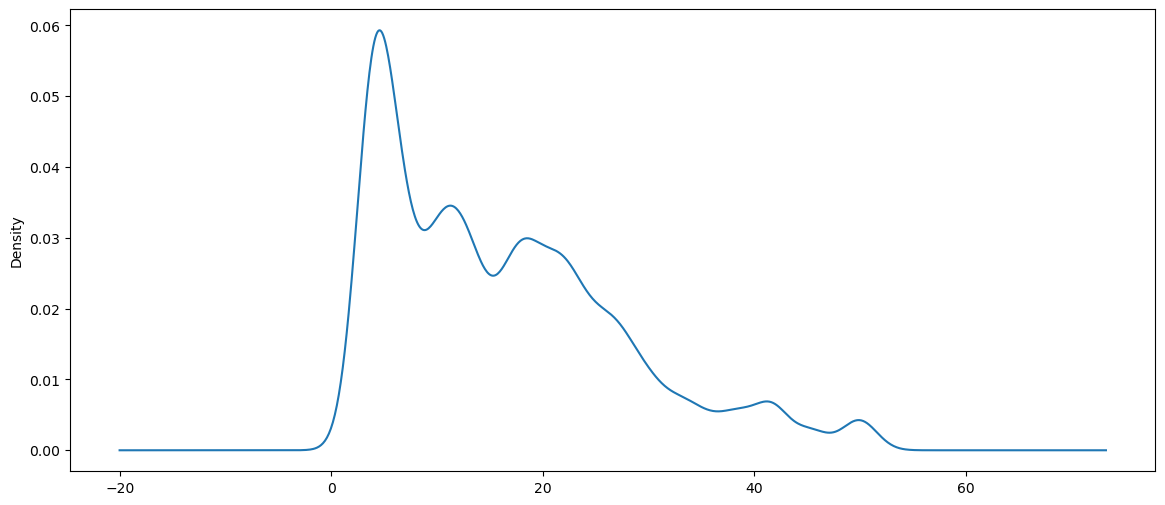

In [51]:
df['rental_gain_return'].plot(kind='density', figsize=(14,6))

In [52]:
df['rental_gain_return'].mean().round(2)

16.34

In [65]:
df['rental_gain_return'].median()

13.597089586175537

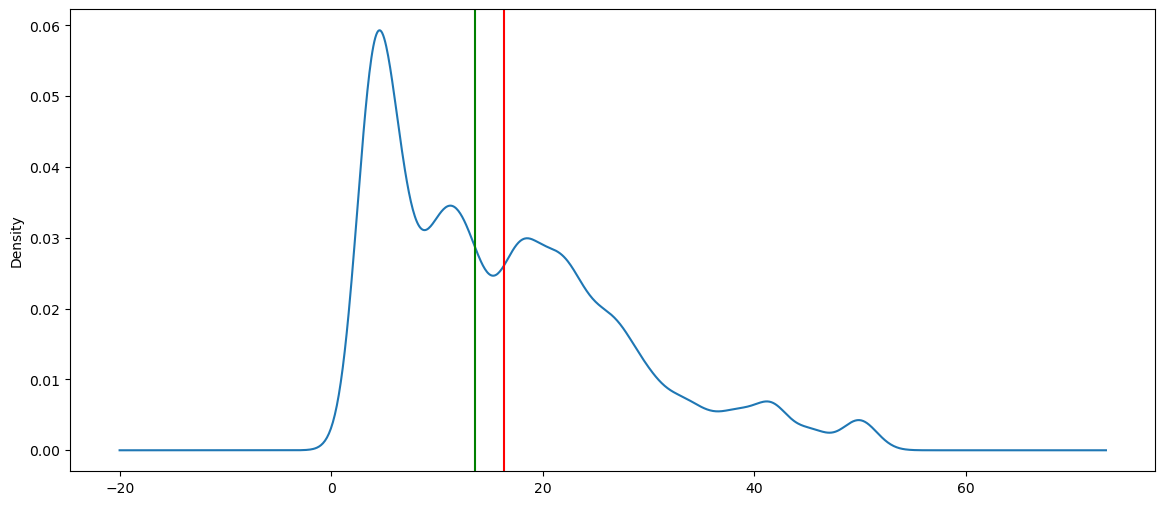

In [66]:
ax = df['rental_gain_return'].plot(kind='density', figsize=(14,6))
ax.axvline(df['rental_gain_return'].mean(), color = 'red')
ax.axvline(df['rental_gain_return'].median(), color = 'green')

In [67]:
df['film_title'].value_counts().mean()

16.747390396659707

In [68]:
df.loc[df['customer_lastname']=='HANSEN']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1368,2005-06-15 14:27:47,2005-06-23 18:07:47,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2603,2005-06-19 06:21:25,2005-06-26 03:19:25,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5209,2005-07-09 11:22:39,2005-07-17 09:31:39,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5266,2005-07-09 14:17:40,2005-07-16 10:42:40,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100


In [70]:
df['film_replacement_cost'].max()

29.99

In [73]:
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max(), 'film_title'].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

In [92]:
df.loc[(df['film_rating']=='PG')|(df['film_rating']=='PG-13')].shape[0]

6797

## Sakila Exercise

In [93]:
df['film_rental_duration'].mean()

4.935489902767389

<AxesSubplot: >

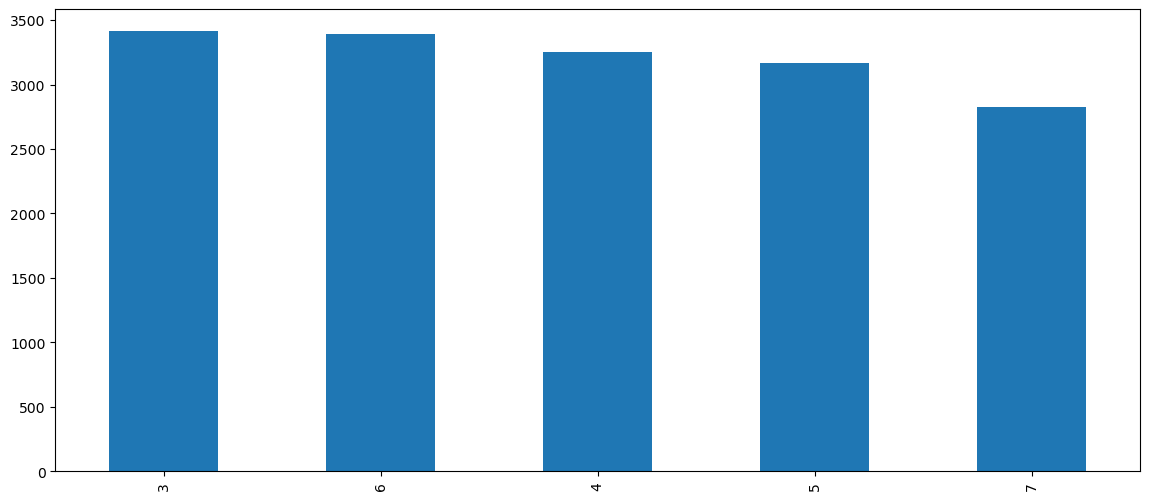

In [95]:
df['film_rental_duration'].value_counts().plot(kind = 'bar', figsize = (14,6))

In [96]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990


<AxesSubplot: ylabel='film_rental_rate'>

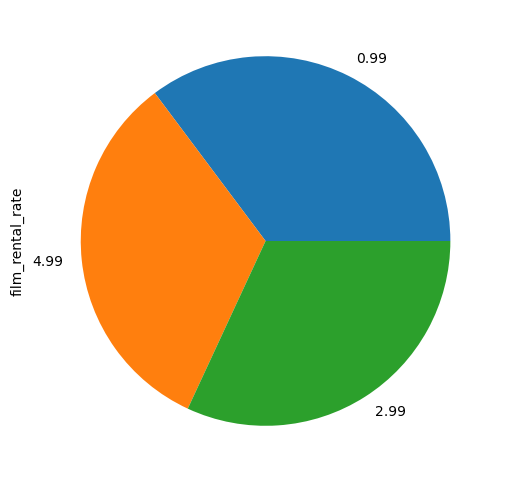

In [97]:
df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(14,6))

<AxesSubplot: >

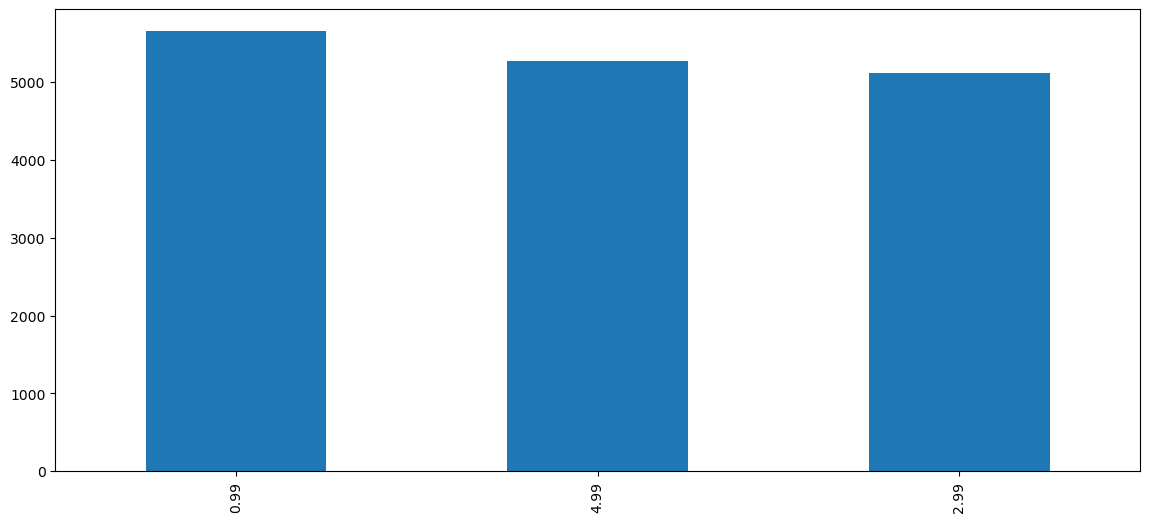

In [98]:
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))

I would say that the bar chart in this case is better than pie chart because you can see the order of the most to least
popular chart in a second.

In [99]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990


In [105]:
df['film_replacement_cost'].unique()

array([21.99, 16.99, 14.99, 29.99, 19.99, 12.99,  9.99, 18.99, 11.99,
       17.99, 24.99, 13.99, 10.99, 28.99, 25.99, 23.99, 20.99, 22.99,
       27.99, 15.99, 26.99])

<AxesSubplot: >

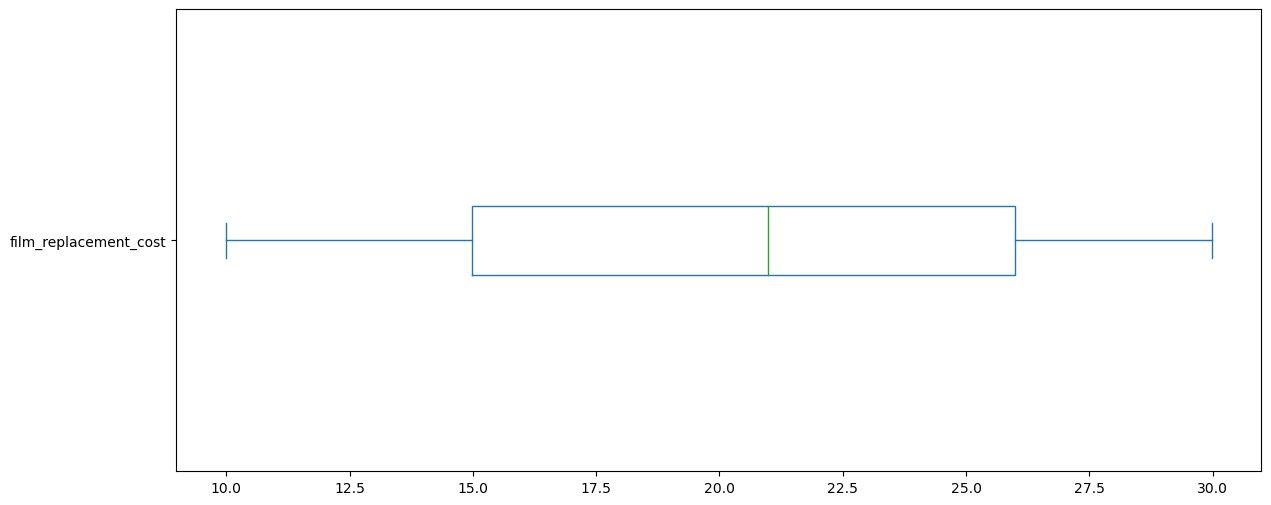

In [110]:
df['film_replacement_cost'].plot(kind='box',vert = False, figsize=(14,6))

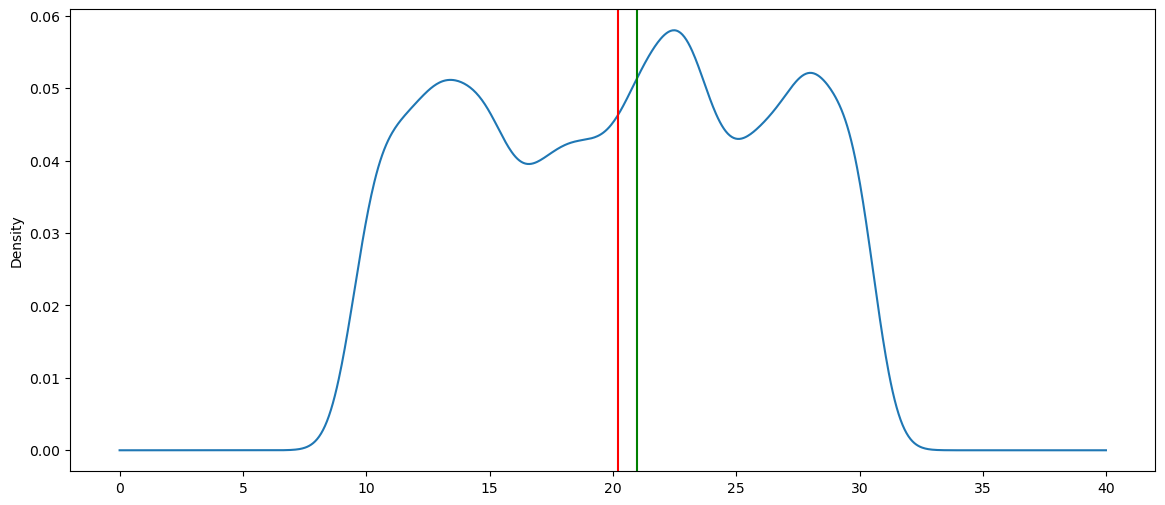

In [109]:
ax = df['film_replacement_cost'].plot(kind='density',figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color = 'red')
ax.axvline(df['film_replacement_cost'].median(), color = 'green')

In [111]:
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<AxesSubplot: >

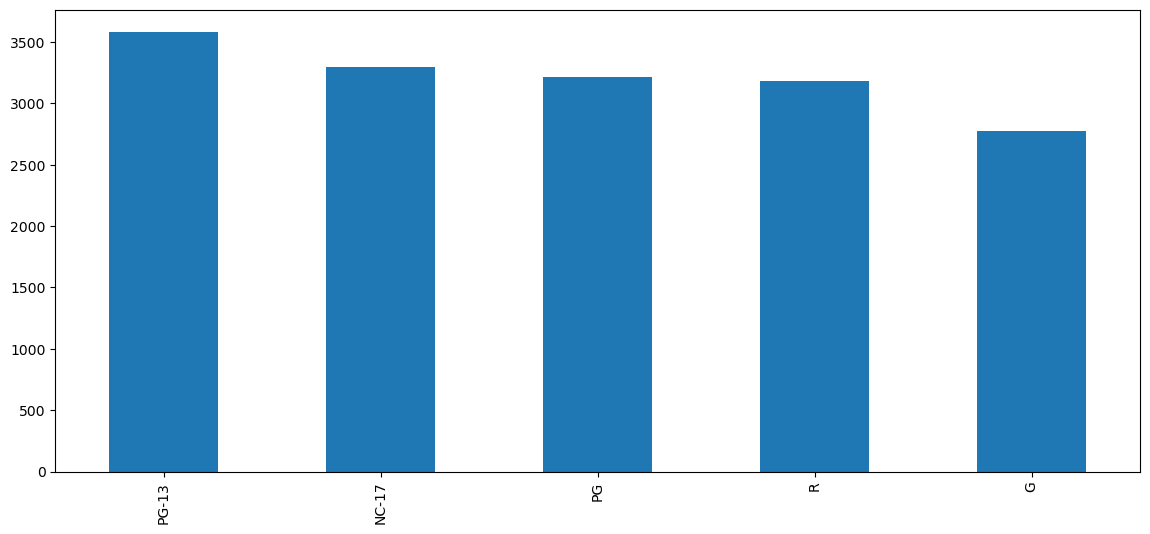

In [112]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

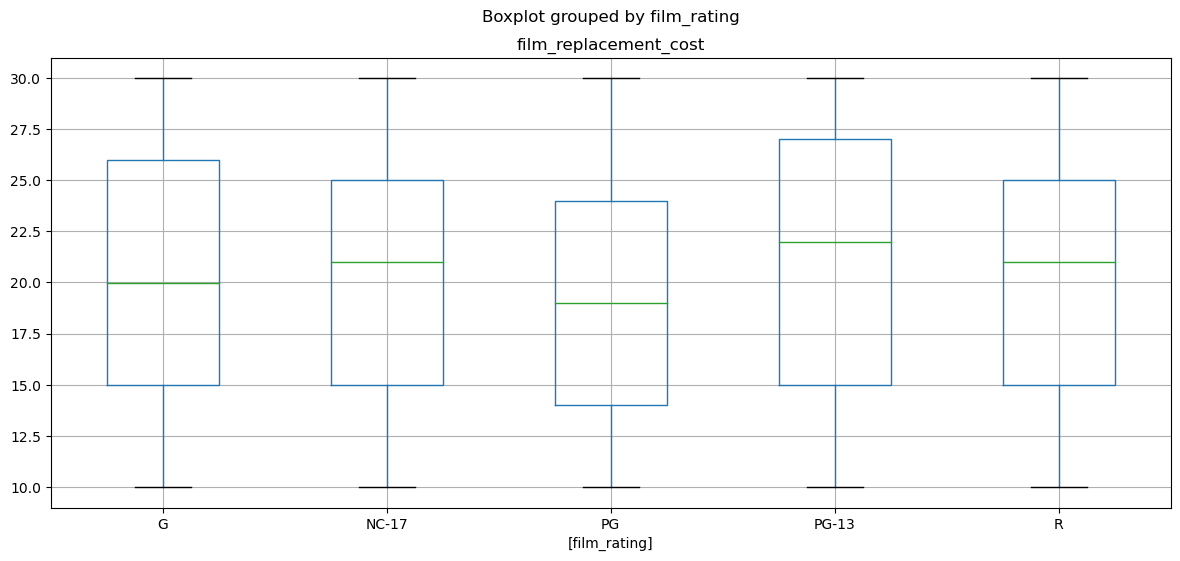

In [115]:
df[['film_replacement_cost','film_rating']].boxplot(by='film_rating', figsize=(14,6))

In [124]:
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1]-x[0]).days,axis=1)
df['rental_days'].mean()

4.525944139713763

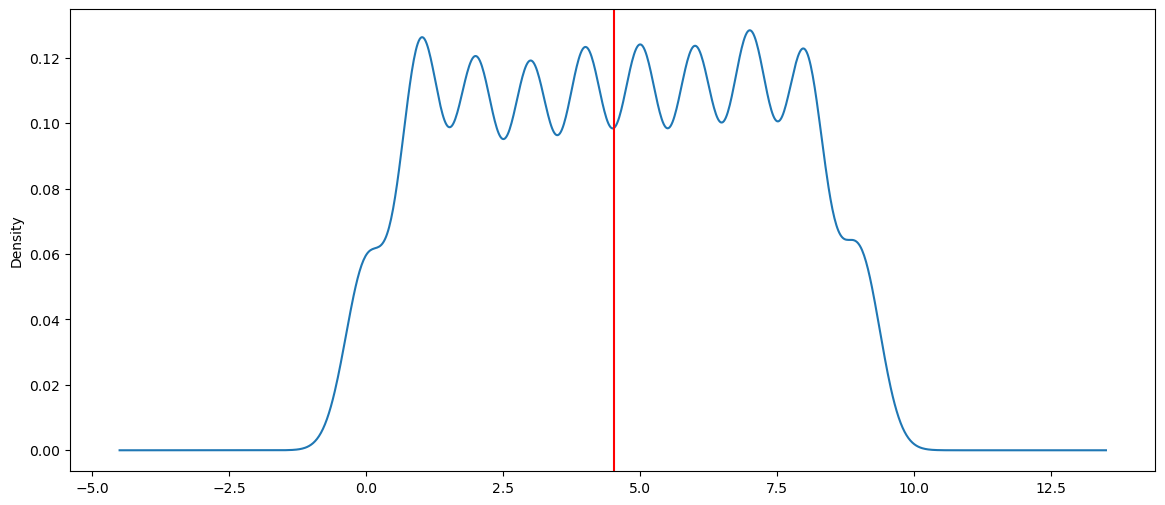

In [128]:
ax = df['rental_days'].plot(kind='density', figsize=(14,6))
ax.axvline(df['rental_days'].mean(), color = 'red')

In [134]:
df['film_daily_rental_rate'] = df['film_rental_rate']/ df['film_rental_duration']
df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

In [138]:
df['film_daily_rental_rate'].unique()

array([0.42714286, 0.165     , 0.598     , 0.198     , 0.2475    ,
       0.83166667, 0.998     , 1.2475    , 0.71285714, 1.66333333,
       0.14142857, 0.33      , 0.49833333, 0.7475    , 0.99666667])

In [135]:
df['film_daily_rental_rate'].mean()

0.6458262471655329

This variable tells us how many dollars do we get per movie rental per day. Mean is 0.64$/day

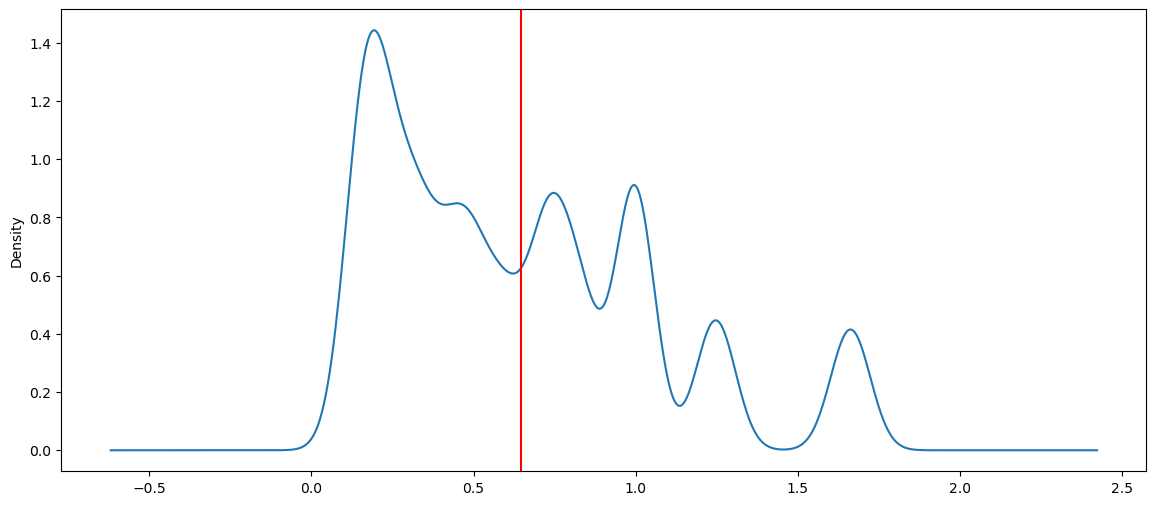

In [137]:
ax = df['film_daily_rental_rate'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_daily_rental_rate'].mean(), color='red')

Top 10 films with lowest daily rental date

In [139]:
df.loc[df['film_daily_rental_rate']==df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,3.414971,6.0,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.306220,3.0,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,3.536977,7.0,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,6.604403,1.0,0.141429
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,3.301100,9.0,0.141429
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,9.909910,3.0,0.141429
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,9.909910,6.0,0.141429
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.306220,4.0,0.141429
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,6.191370,6.0,0.141429


In [140]:
df.loc[df['film_daily_rental_rate']==df['film_daily_rental_rate'].max()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,19.967987,5.0,1.663333
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,21.705089,2.0,1.663333
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,19.199692,6.0,1.663333
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,19.967987,9.0,1.663333
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,17.827796,0.0,1.663333
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,19.967987,4.0,1.663333
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,27.737632,8.0,1.663333
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,17.827796,8.0,1.663333
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,23.773225,5.0,1.663333


In [144]:
df.loc[(df['rental_store_city']=='Lethbridge')].shape[0]

7923

In [150]:
ax = df.loc[(df['rental_store_city']=='Lethbridge'),'film_rating'].value_counts()

<AxesSubplot: >

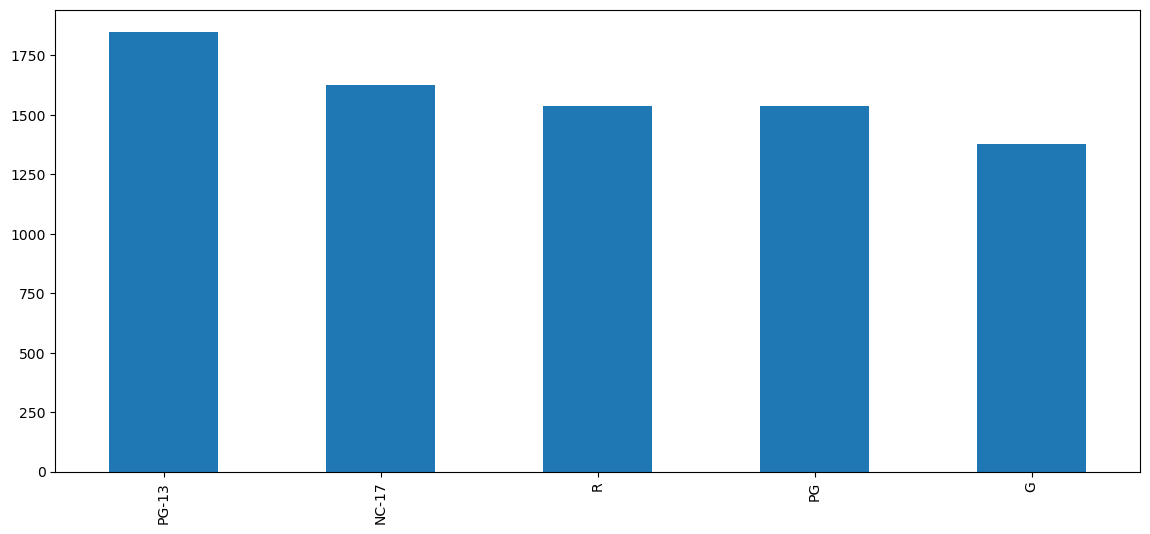

In [152]:
ax.plot(kind='bar', figsize=(14,6))

In [156]:
ax = df.loc[(df['rental_store_city']=='Woodridge')&(df['film_rental_duration']>5)].shape[0]
ax

3186

In [158]:
df.loc[(df['store_id']==2)|(df['film_replacement_cost']<10.99)].shape[0]

8444